# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [3]:
cities

['udachnyy',
 'qostanay',
 'nanortalik',
 'bredasdorp',
 'nikel',
 'sumiswald',
 'tasiilaq',
 'kodiak',
 'labuhan',
 'ahipara',
 'sentyabrskiy',
 'sur',
 'biak',
 'rikitea',
 'cidreira',
 'dikson',
 'punta arenas',
 'hammerfest',
 'qaanaaq',
 'yellowknife',
 'itaituba',
 'barentsburg',
 'katsuura',
 'krasnoselkup',
 'guerrero negro',
 'azanka',
 'bluff',
 'jamestown',
 'kahului',
 'albany',
 'san cristobal',
 'amderma',
 'zhezkazgan',
 'havre-saint-pierre',
 'esperance',
 'ilulissat',
 'hurghada',
 'puerto ayora',
 'kamenskoye',
 'longyearbyen',
 'clinton',
 'alta floresta',
 'nouadhibou',
 'arraial do cabo',
 'atuona',
 'east london',
 'rocha',
 'new norfolk',
 'ningan',
 'ponta do sol',
 'surt',
 'ust-kut',
 'leningradskiy',
 'illoqqortoormiut',
 'busselton',
 'hermanus',
 'halifax',
 'egvekinot',
 'shenjiamen',
 'vanderhoof',
 'paamiut',
 'vao',
 'hobart',
 'ushuaia',
 'broken hill',
 'mys shmidta',
 'vaini',
 'elizabeth city',
 'port alfred',
 'pangody',
 'nikolskoye',
 'butaritari

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

query_url = url + 'appid=' + api_key +'&units=' + units + '&q='

In [5]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=5d3dd5a7a9eef196a9bef0aa8fecf820&units=metric&q=


In [6]:
# set up lists to hold reponse info
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
country = []
date = []
wind_speed = []
city_list = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try :
        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(city)
        
        print(f"The latitude information received is: {lat}")
        print(f"The temperature information received is: {temp}")

    except : 
        print('city not found')
        pass

The latitude information received is: [66.42]
city not found
The latitude information received is: [66.42, 53.17]
city not found
The latitude information received is: [66.42, 53.17, 60.14]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17]
city not found
city not found
The latitude information received is: [66.42, 53.17,

city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07,

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44]
city not found
city not found
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87,

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58,

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -5

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85]
city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56]
city not found
The l

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

city not found
The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

The latitude information received is: [66.42, 53.17, 60.14, -34.53, 69.41, 47.03, 65.61, 39.95, -2.54, -35.17, 22.57, -0.91, -23.12, -30.17, 73.51, -53.16, 70.66, 77.48, 62.45, -4.26, 33.93, 27.97, 58.04, -23.58, -33.21, 20.89, 42.65, 14.68, 47.8, 50.23, -33.86, 69.22, -0.74, 78.22, 41.28, -9.87, 20.93, -22.97, -9.8, -33.02, -34.48, -42.78, -20.63, 31.21, 56.78, 69.38, -33.64, -34.42, 44.65, 66.32, 29.96, 54.02, 61.99, 59.1, -42.88, -54.81, -31.97, 15.34, 36.3, -33.59, 65.85, 59.7, 3.07, 45.36, -46.43, 55.74, 34.64, 63.75, 66.56, 19.71, 47.66, 36.75, 43.13, 71.98, 71.03, -21.21, -20.77, 25.44, 14.9, 6.8, -34.05, 37.68, 60.79, 11.85, 35.73, 34.06, -0.6, 65.28, 60.4, 26.59, -19.8, 69.7, 36.17, -14.83, -5.56, -7.38, -21.64, 64.42, 35.01, 7.12, -42.48, 25.02, -0.19, 31.8, -16.48, -8.71, 63.84, 50.7, -43.03, 2.82, 8, 15.02, 11, -38.55, -43.3, 43.66, 64.73, -12.12, 60.35, 50.41, 10.59, 34.19, 39.31, 29.85, -45.41, 55.64, 62.93, -20.73, 37.46, 13.78, 10.41, -46.19, 44.56, 37.61, 13.22, -46.28

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_list,
    "lat": lat,
    "max_temp": max_temp,
    "cloudiness": cloudiness,
    "humidity": humidity,
    "lng": lng,
    "country": country,
    "date": date,
    "wind_speed": wind_speed

}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,max_temp,cloudiness,humidity,lng,country,date,wind_speed
0,udachnyy,66.42,16.00,0,72,112.40,RU,1562611419,2.00
1,qostanay,53.17,19.00,0,55,63.58,KZ,1562611419,2.00
2,nanortalik,60.14,11.18,100,45,-45.24,GL,1562611419,4.78
3,bredasdorp,-34.53,19.00,50,59,20.04,ZA,1562611420,5.70
4,nikel,69.41,10.00,0,66,30.21,NO,1562611420,7.20


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
to_csv = weather_data.to_csv("weatherHW.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

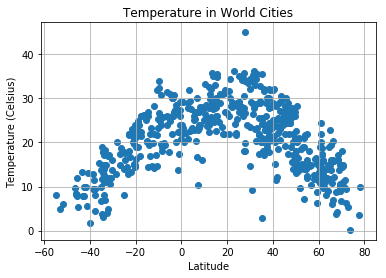

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

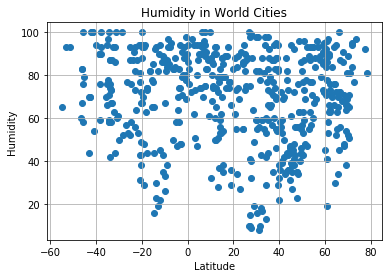

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

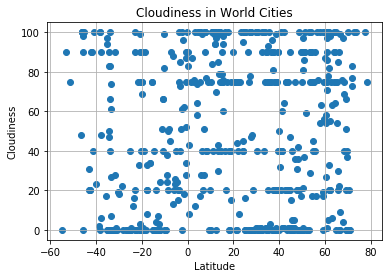

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

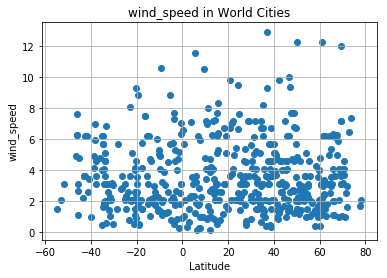

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("wind_speed in World Cities")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("wind_speedInWorldCities.png")

# Show plot
plt.show()